In [1]:
#import all pacakges

import numpy as np
import pandas as pd
import scanpy as sc
import scipy.io
import matplotlib.pyplot as plt
import os
import anndata

import seaborn as sns

from scipy.stats import rankdata 
from scipy.stats.stats import pearsonr   

import matplotlib.patches as ptc
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.axis import Tick 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/rds/general/user/aalmeid2/home/.local/lib/python3.6/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
sc.settings.verbosity =3
sc.logging.print_version_and_date()
sc.settings.set_figure_params(dpi=300,fontsize=10,dpi_save=300)

Running Scanpy 1.7.1, on 2022-03-22 07:12.


# Function

In [3]:
def gene_coloc(adata,Gene1="INHBA",Gene2="NRG1",threshold=0.1,mode=("plot","table"),color1="Reds",color2="Greens",color3="Blues",alpha=1,size=0.3,fontsize=8,label_width="25%",label_height="2.5%"):
    import warnings
    warnings.filterwarnings("ignore")
    def plot_coloc():
        df=pd.DataFrame(adata.obsm["X_umap"],columns=["x","y"],index=adata.obs.index)
        df["x1"]=df["x"]
        df["y1"]=df["y"]
        df["x2"]=df["x"]
        df["y2"]=df["y"]
        df["x3"]=df["x"]
        df["y3"]=df["y"]
        df["x4"]=df["x"]
        df["y4"]=df["y"]
        matrix["Gene1"]=matrix[Gene1]
        matrix["Gene2"]=matrix[Gene2]
        coloc=(matrix["Gene1"]+matrix["Gene2"])/2
        df.x1[matrix.Gene1<threshold]="NA"
        df.y1[matrix.Gene1<threshold]="NA"
        df.x1[matrix.Gene2>=threshold]="NA"
        df.y1[matrix.Gene2>=threshold]="NA"
        df.x2[matrix.Gene2<threshold]="NA"
        df.y2[matrix.Gene2<threshold]="NA"
        df.x2[matrix.Gene1>=threshold]="NA"
        df.y2[matrix.Gene1>=threshold]="NA"
        df.x3[matrix.Gene1>=threshold]="NA"
        df.y3[matrix.Gene1>=threshold]="NA"
        df.x3[matrix.Gene2>=threshold]="NA"
        df.y3[matrix.Gene2>=threshold]="NA"
        df.x4[matrix.Gene1<threshold]="NA"
        df.y4[matrix.Gene1<threshold]="NA"
        df.x4[matrix.Gene2<threshold]="NA"
        df.y4[matrix.Gene2<threshold]="NA"
        df.x1=df.x1.replace("NA",np.NaN)
        df.y1=df.y1.replace("NA",np.NaN)
        df.x2=df.x2.replace("NA",np.NaN)
        df.y2=df.y2.replace("NA",np.NaN)
        df.x3=df.x3.replace("NA",np.NaN)
        df.y3=df.y3.replace("NA",np.NaN)
        df.x4=df.x4.replace("NA",np.NaN)
        df.y4=df.y4.replace("NA",np.NaN)
        per=df.x4.count()/(df.x1.count()+df.x2.count()+df.x4.count())
        per=per*100
        c1Big = cm.get_cmap(color1, 512)
        c1 = ListedColormap(c1Big(np.linspace(0.3, 1.0, 256)))
        c2Big = cm.get_cmap(color2, 512)
        c2 = ListedColormap(c2Big(np.linspace(0.3, 1.0, 256)))
        c3Big = cm.get_cmap(color3, 512)
        c3 = ListedColormap(c3Big(np.linspace(0.3, 1.0, 256)))
        fig, ax = plt.subplots()

        plt.xlabel("UMAP1")
        plt.ylabel("UMAP2")
        plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False,labelleft=False)
        ax.scatter(df.x3,df.y3,s=size,c="lightgrey",alpha=1,marker="o",edgecolors="none")
        ax.set_title("%.2f" % per +"%" + " Co-localisation")
        im=ax.scatter(df.x1,df.y1,s=size,c=matrix[Gene1],cmap=c1,alpha=alpha,marker="o",edgecolors="none")
        im2=ax.scatter(df.x2,df.y2,s=size,c=matrix[Gene2],cmap=c2,alpha=alpha,marker="o",edgecolors="none")
        im3=ax.scatter(df.x4,df.y4,s=size,c=coloc,cmap=c3,alpha=alpha,marker="o",edgecolors="none")
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        axins = inset_axes(ax,
                       width=label_width,  # width = 5% of parent_bbox width
                       height=label_height,  # height : 50%
                       loc='lower left',
                       bbox_to_anchor=(1.05, 0, 1, 1),
                       bbox_transform=ax.transAxes,
                       borderpad=0,
                       )
        axins2 = inset_axes(ax,
                       width=label_width,  # width = 5% of parent_bbox width
                       height=label_height,  # height : 50%
                       loc='lower left',
                       bbox_to_anchor=(1.05, 0.15, 1, 1),
                       bbox_transform=ax.transAxes,
                       borderpad=0,
                       )
        axins3 = inset_axes(ax,
                       width=label_width,  # width = 5% of parent_bbox width
                       height=label_height,  # height : 50%
                       loc='lower left',
                       bbox_to_anchor=(1.05, 0.3, 1, 1),
                       bbox_transform=ax.transAxes,
                       borderpad=0,
                       )
        cb1=fig.colorbar(im, cax=axins,orientation='horizontal',shrink=0.3)
        cb2=fig.colorbar(im2, cax=axins2,orientation='horizontal',shrink=0.3)
        cb3=fig.colorbar(im3, cax=axins3,orientation='horizontal',shrink=0.3)
        cb1.ax.set_title(label=Gene1,y=0.6,fontsize=fontsize)
        cb2.ax.set_title(label=Gene2,y=0.6,fontsize=fontsize)
        cb3.ax.set_title(label="Mean Co-loc",y=0.6,fontsize=fontsize)
        cb1.ax.tick_params(labelsize=fontsize)
        cb2.ax.tick_params(labelsize=fontsize)
        cb3.ax.tick_params(labelsize=fontsize)
        del matrix["Gene1"]
        del matrix["Gene2"]
    def coloc_table(adata=adata,Gene1=Gene1,Gene2=Gene2,threshold=threshold):
            df=pd.DataFrame(adata.obsm["X_umap"],columns=["x","y"],index=adata.obs.index)
            df["x1"]=df["x"]
            df["x2"]=df["x"]
            df["x3"]=df["x"]
            df["x4"]=df["x"]
            matrix["Gene1"]=matrix[Gene1]
            matrix["Gene2"]=matrix[Gene2]
            coloc=(matrix["Gene1"]+matrix["Gene2"])/2
            df.x1[matrix.Gene1<threshold]="NA"
            df.x1[matrix.Gene2>=threshold]="NA"
            df.x2[matrix.Gene2<threshold]="NA"
            df.x2[matrix.Gene1>=threshold]="NA"
            df.x4[matrix.Gene1<threshold]="NA"
            df.x4[matrix.Gene2<threshold]="NA"
            df.x1=df.x1.replace("NA",np.NaN)
            df.x2=df.x2.replace("NA",np.NaN)
            df.x4=df.x4.replace("NA",np.NaN)
            per=df.x4.count()/(df.x1.count()+df.x2.count()+df.x4.count())
            per=per*100
            name=Gene1+"_"+Gene2
            data={"Genes":name,"Percentage":per}
            del matrix["Gene1"]
            del matrix["Gene2"]
            return data
        
        
        
    if mode=="table":
        d = pd.DataFrame()
        for i,j in [(i,j) for i in Gene1 for j in Gene2]:
            if i==j:
                d=d
            else:
                x = coloc_table(Gene1=i,Gene2=j)
                ans=pd.DataFrame({"Genes":[x["Genes"]],"Coloc_Percent":[x["Percentage"]]})
                d=pd.concat([d,ans])
        return d
    
    if mode=="plot":
        plot_coloc()
    

# Explanation:
Function has two modes: plot and table <br>
Plot creates a UMAP with 2 genes, including their co-localization <br>
Table creates a data frame of 2 or more genes <br>
Requires anndata object <br>
### Arguments for table:
>mode="table" <br>
>Gene1 - first list of genes. Has to be at least two <br>
>Gene2 - second list of genes. Has to be at least two <br> 
>threshold - expression cut-off <br>
>Calculates the % overlap between genes in Gene1 with those in Gene2. DOES NOT calculate overlaps WITHIN each list (add gene to both lists to do that - self co-localisation will not be calculated).
### Arguments for plot:
>mode="plot" <br>
>Gene1 - first gene. Has to be only one <br>
>Gene2 - second gene. Has to be only one <br> 
>threshold - expression cut-off <br>
>size - size of the dots <br>
>color1 - dot color for 1st gene. From matplotlib <br>
>color2 - dot color for 2nd gene. From matplotlib <br>
>color3 - dot color for co-localization. From matplotlib <br>
>alpha - dot transparency (0 to 1: 1 is opaque;0 is transparent) <br>
>fontsize - size of the text font

# Load and prepare matrix

In [4]:
#set path to object
date="20220321"
path_to_fast="/rds/general/user/aalmeid2"
path_out=path_to_fast+"/projects/cardiac_single_cell_biology/live/DCM_project/"
path_in=path_to_fast+"/projects/cardiac_single_cell_biology/live/DCM_project/"

In [5]:
adata=sc.read_h5ad(path_in + "ec_20210804_no_Doublets.h5ad")

In [6]:
#create matrix with genexpression - faster than calling it in the function
matrix=pd.DataFrame(adata.raw.X.toarray(),columns=adata.raw.var.index,index=adata.obs.index)

# Create Tables

In [7]:
#default threshold=0.1
df=gene_coloc(adata,mode="table",Gene1=["CDH5","PLVAP","SMOC1"],Gene2=["CDH5","ACKR1","POSTN"],threshold=0.1)

In [8]:
df

,Genes,Coloc_Percent
0,CDH5_ACKR1,3.132876
0,CDH5_POSTN,6.223382
0,PLVAP_CDH5,5.834781
0,PLVAP_ACKR1,10.511195
0,PLVAP_POSTN,13.020797
0,SMOC1_CDH5,2.165283
0,SMOC1_ACKR1,0.351964
0,SMOC1_POSTN,21.563557


In [9]:
#threshold=1
df=gene_coloc(adata,mode="table",Gene1=["CDH5","PLVAP","SMOC1"],Gene2=["CDH5","ACKR1","POSTN"],threshold=1)

In [10]:
df

,Genes,Coloc_Percent
0,CDH5_ACKR1,1.028122
0,CDH5_POSTN,2.740109
0,PLVAP_CDH5,1.818885
0,PLVAP_ACKR1,5.232718
0,PLVAP_POSTN,6.800754
0,SMOC1_CDH5,1.204327
0,SMOC1_ACKR1,0.062286
0,SMOC1_POSTN,18.119197


In [11]:
#export
df.to_csv("coloc_table.csv")

# Plot 2 genes on a UMAP

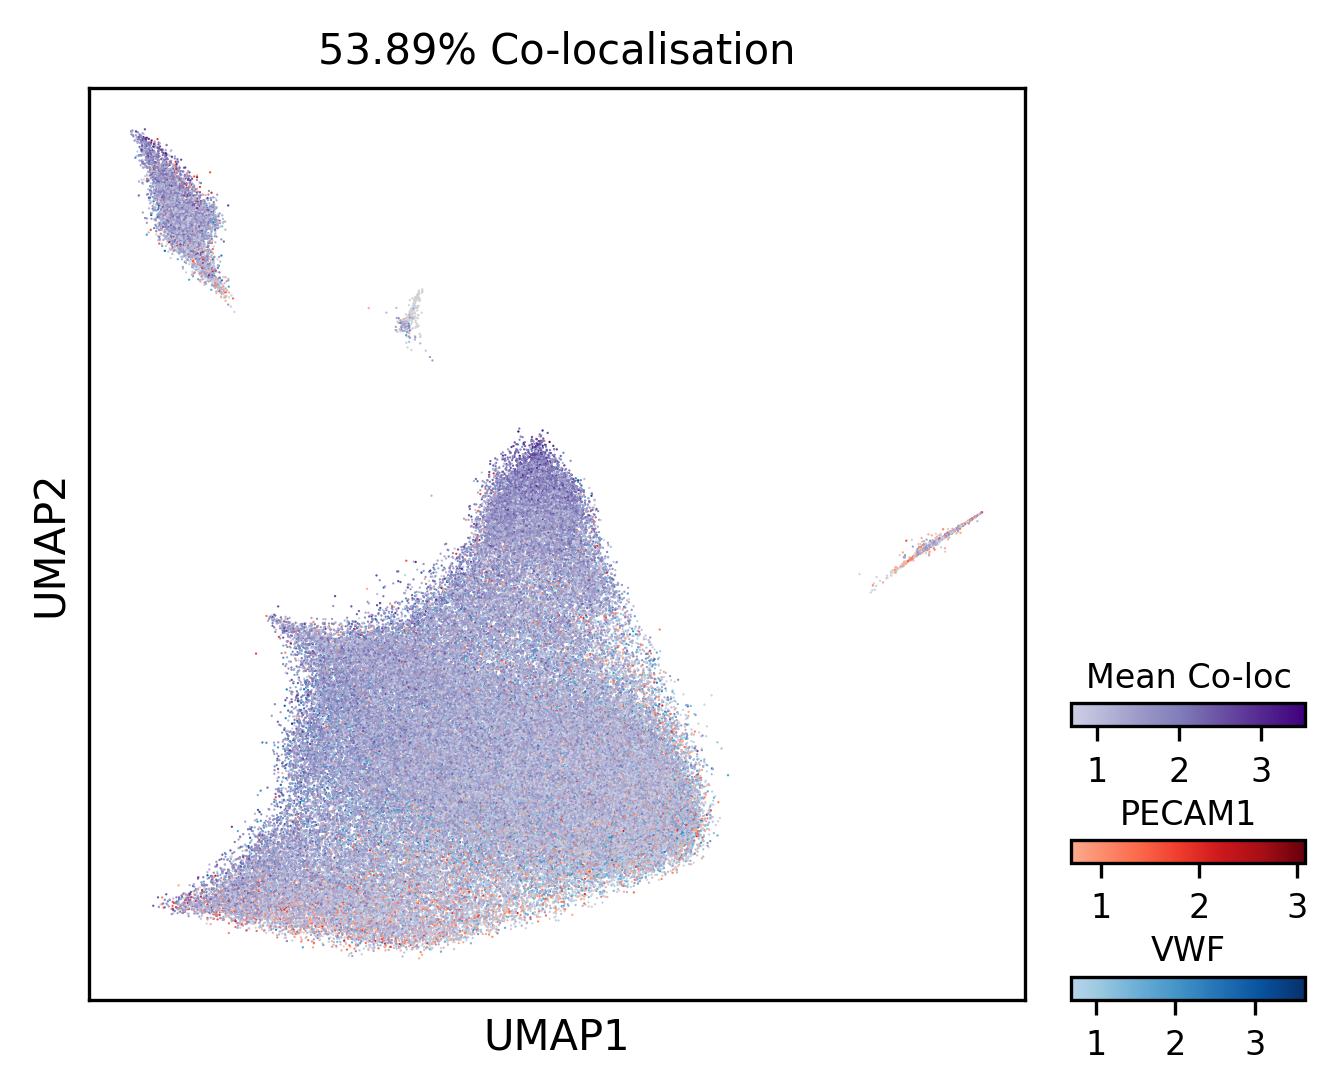

In [12]:
#default arguments
gene_coloc(adata,mode="plot",Gene1="VWF",Gene2="PECAM1",size=0.3,threshold=0.1,color1="Blues",color2="Reds",color3="Purples",alpha=1)

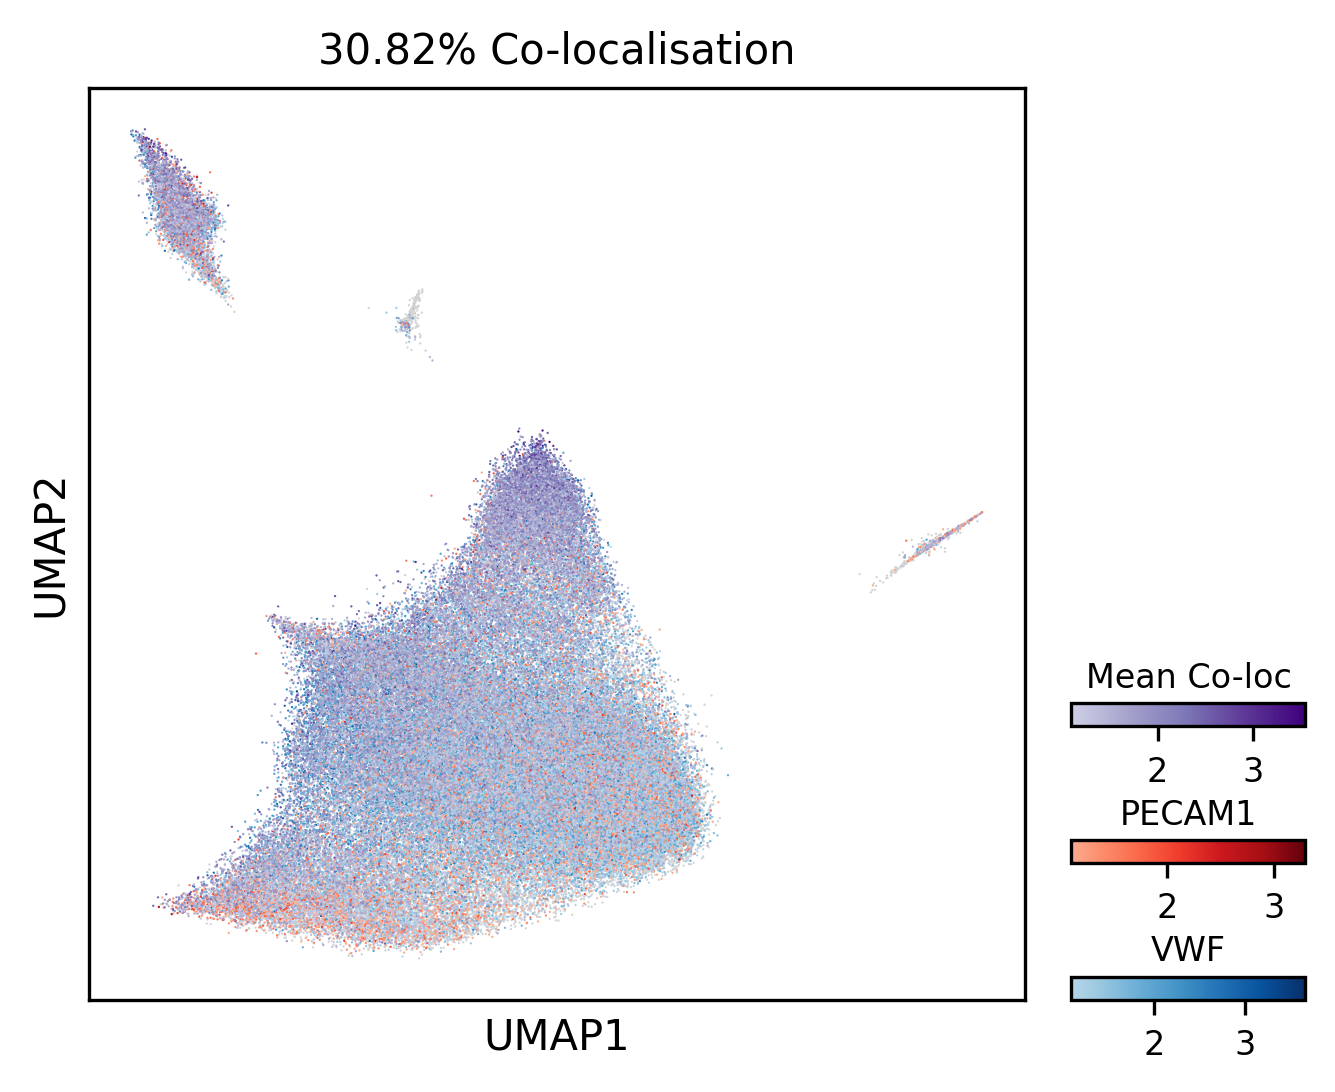

In [13]:
#theshold=1
gene_coloc(adata,mode="plot",Gene1="VWF",Gene2="PECAM1",size=0.3,threshold=1,color1="Blues",color2="Reds",color3="Purples",alpha=1)

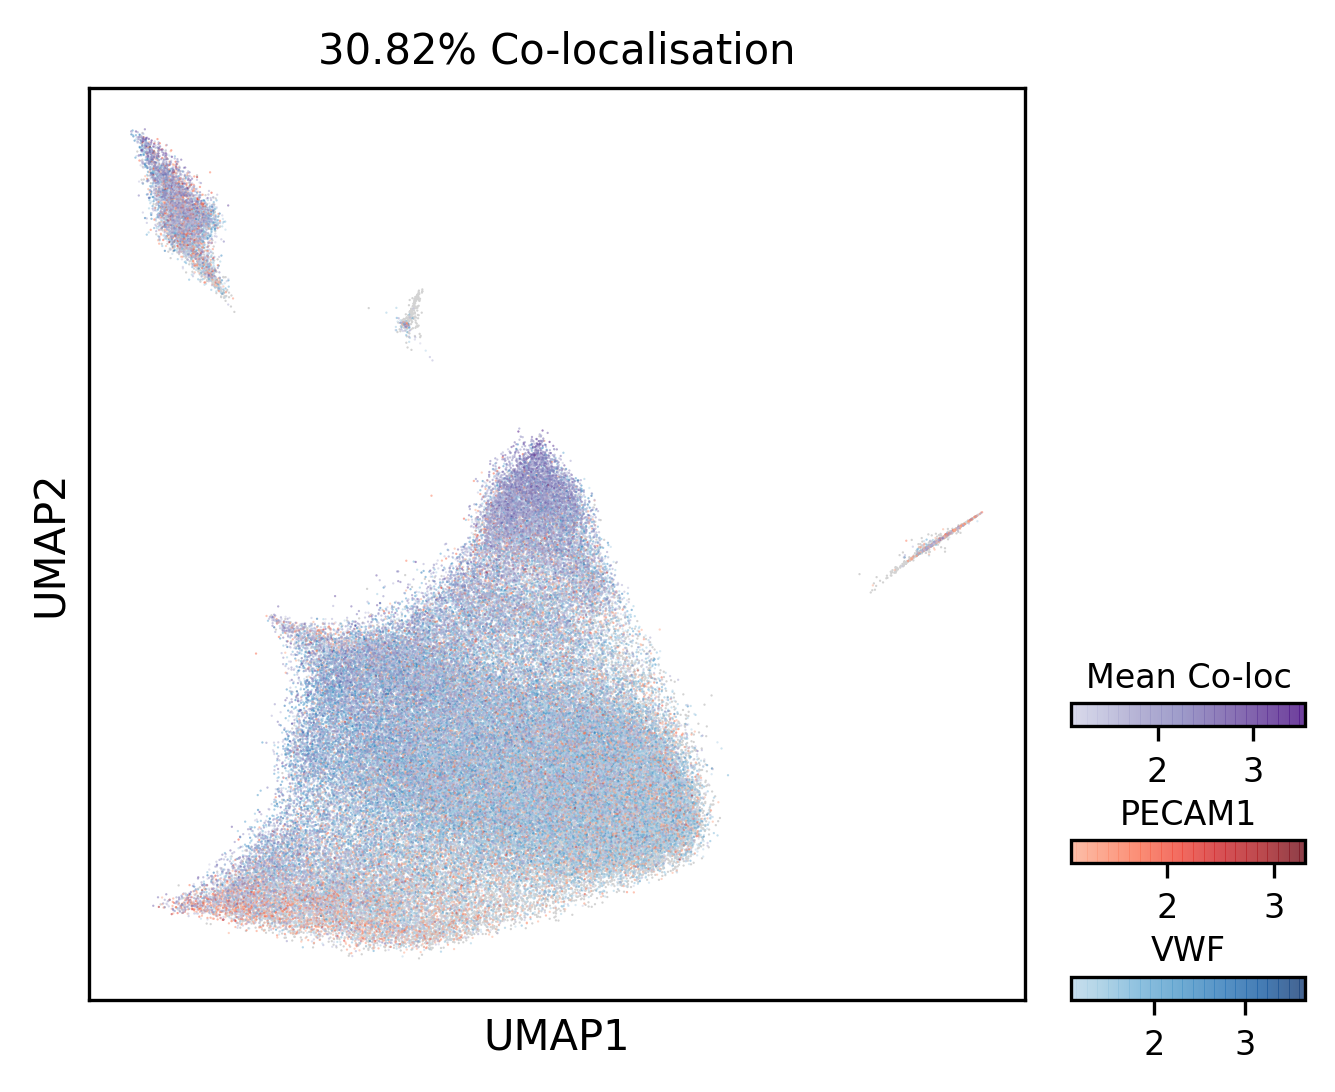

In [14]:
#alpha=0.5 (threshold=1)
gene_coloc(adata,mode="plot",Gene1="VWF",Gene2="PECAM1",size=0.3,threshold=1,color1="Blues",color2="Reds",color3="Purples",alpha=0.5)

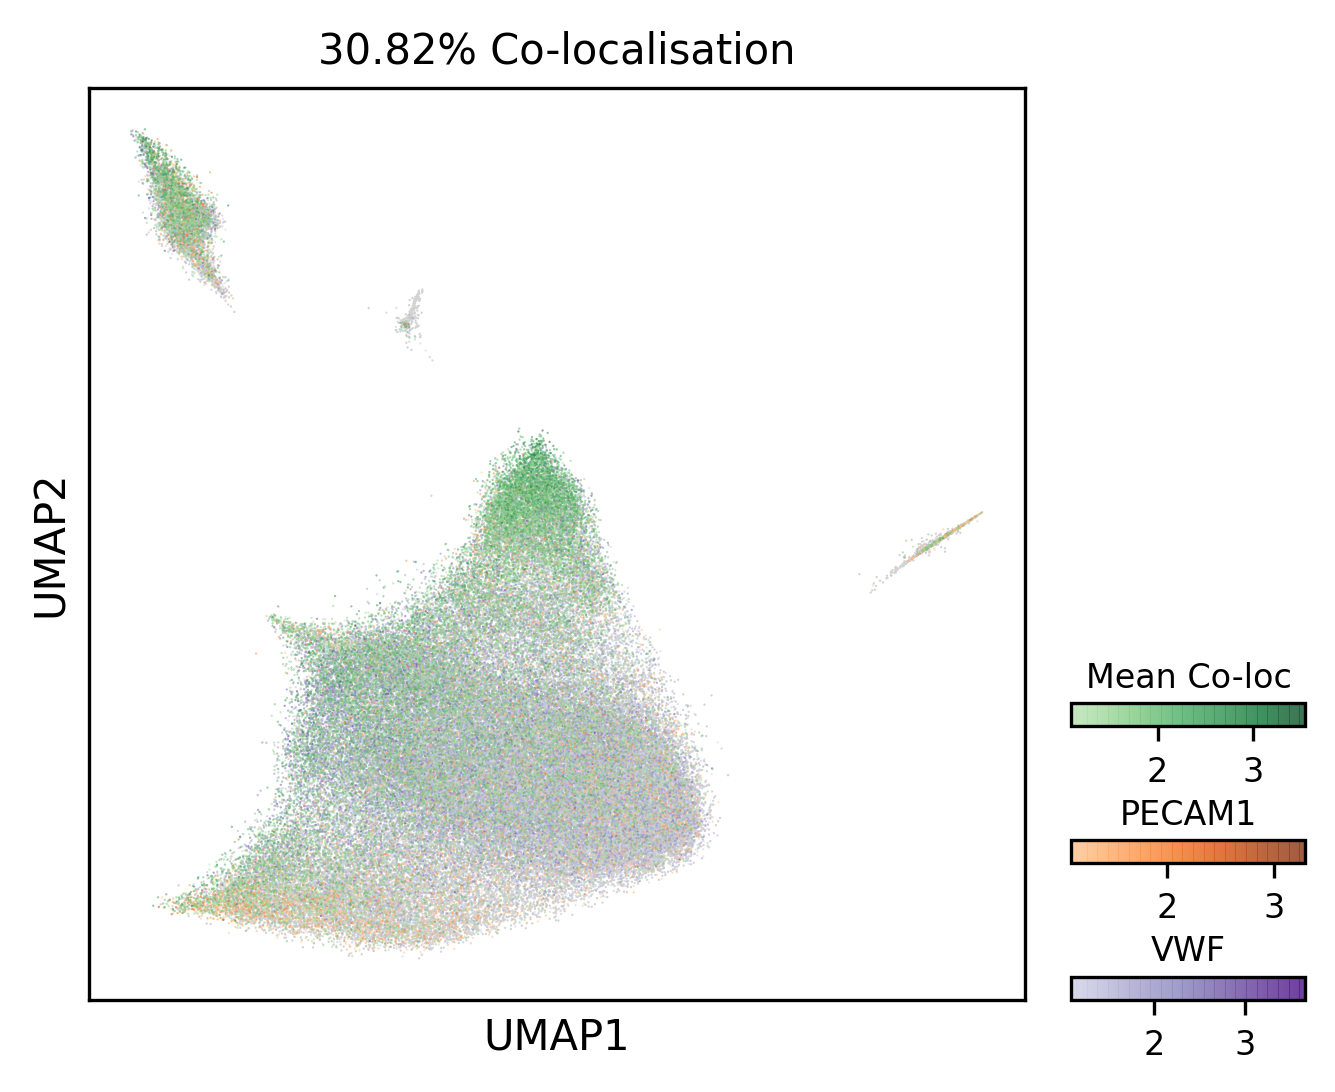

In [15]:
#change colors (threshold=1,alpha=0.5)
gene_coloc(adata,mode="plot",Gene1="VWF",Gene2="PECAM1",size=0.3,threshold=1,color1="Purples",color2="Oranges",color3="Greens",alpha=0.5)

# Co-localisation between all genes
Not recommended in interactive mode - this portion is just for representation <br>
To run co-localisation between all the genes, submit job to HPC: See "coloc_sub.sh" as an script example to run "dcm_coloc_all2.py"

In [16]:
#n genes before filtering
len(adata.var.index)

33538

In [17]:
#do some basic filtering first
sc.pp.filter_genes(adata, min_cells=25) # filter genes expressed in small number of cells

filtered out 10051 genes that are detected in less than 25 cells


In [18]:
#n genes after filtering for minimum number of cells
len(adata.var.index)

23487

In [19]:
# filter genes  with low epxression
sc.pp.filter_genes(adata, min_counts=50) 
#previous filter means that at least 25 cells express the gene. 
#Setting min counts to 50 means each of those has to have at least 2 counts

filtered out 2972 genes that are detected in less than 50 counts


In [20]:
#n genes after all filtering
len(adata.var.index)

20515

In [21]:
adata.raw=adata

In [22]:
#create matrix after filtering
matrix=pd.DataFrame(adata.raw.X.toarray(),columns=adata.raw.var.index,index=adata.obs.index)

In [23]:
all=np.asarray(adata.var.index)

In [ ]:
df=gene_coloc(adata,mode="table",Gene1=all,Gene2=all,threshold=0.1)
#change either Gene1 or Gene2 to a list of genes, to run this global colocalisation for only those genes

In [ ]:
df.to_csv("all_coloc.csv")